In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
# Carica il file NetCDF
ds = xr.open_dataset('data/era5/north/tas/latlon_2023.nc')  # <-- Sostituisci con il tuo file

# Mostra le variabili disponibili
print(ds)

<xarray.Dataset> Size: 376MB
Dimensions:    (latitude: 361, longitude: 1440, time: 181)
Coordinates:
  * latitude   (latitude) float64 3kB 90.0 89.75 89.5 89.25 ... 0.5 0.25 0.0
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
  * time       (time) datetime64[ns] 1kB 2023-01-01 2023-01-02 ... 2023-06-30
Data variables:
    tas        (time, latitude, longitude) float32 376MB ...


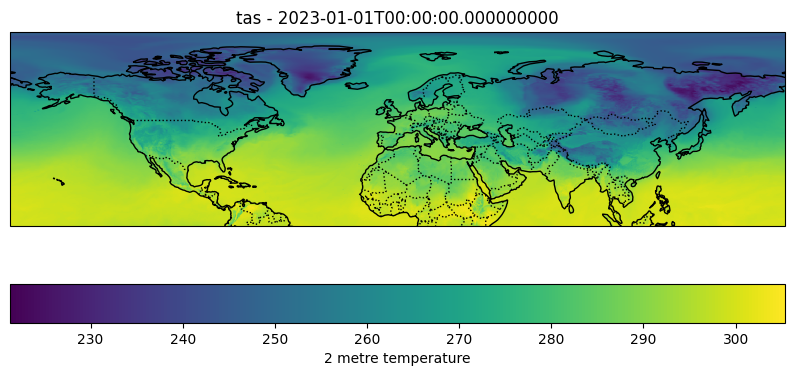

In [8]:

# Seleziona la variabile da plottare (modifica secondo il tuo dataset)
var = ds['tas']  # <-- es. 'temperature', 'precipitation', ecc.

# Seleziona una fetta temporale se necessario (es. il primo timestep)
data = var.isel(time=0) if 'time' in var.dims else var

# Estrai coordinate
lat = data['lat'] if 'lat' in data.coords else data['latitude']
lon = data['lon'] if 'lon' in data.coords else data['longitude']

# Crea la figura
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# Aggiungi caratteristiche della mappa
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Plotta la variabile
img = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(), cmap='viridis')
plt.colorbar(img, orientation='horizontal', label=var.long_name if 'long_name' in var.attrs else var.name)

# Titolo opzionale
plt.title(f"{var.name} - {str(data.time.values) if 'time' in data.coords else ''}")

# Mostra la mappa
plt.show()
